<span style="font-family:Helvetica Light">

# Exploratory Data Analysis

The objective of this notebook is to analyze my Spotify listening data from the past year and answer various questions regarding my listening habits:
- *Listening Patterns*:
    - *Total Listening Time*: 
        - How many minutes/hours of music have I listened to in a year?
        - How many minutes/hours of podcasts have I listened to in a year?
    - *Monthly Listening Analysis*: 
        - How much time did I spend on Spotify each month?
    - *Weekly Listening Analysis*: 
        - When in the week do I listen to music the most?
        - Do my habits change during the weekend?
    - *Daily Listening Analysis*: 
        - How do I use Spotify around the clock?
- *Content Analysis*:
    - *Content Proportion*:
        - What is the proportion of music vs. podcasts?
    - *Top Content*:
        - What were my top podcasts of the year?
        - Who were my most listened-to artists?
        - What were my top tracks of the year?
- *Genre Analysis*:
    - What were my most popular genres?
- *Musical Moods*:
    - How did my musical moods change?
 
By answering these questions, I hope to get a clearer picture of my Spotify journey and what I enjoy listening to the most.

</span>

In [1]:
import pandas as pd
import numpy as np
from datetime import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import ast
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# load historical streaming music data
df = pd.read_json('../data/raw/StreamingHistory_music_0.json')
print(df.shape)
df.head()

(4940, 4)


,endTime,artistName,trackName,msPlayed
0,2023-05-16 15:43,John Lennon,Isolation - Remastered 2010,142789
1,2023-05-17 04:43,John Lennon,Isolation - Remastered 2010,29448
2,2023-05-17 04:44,John Lennon,Love - Remastered 2010,65613
3,2023-05-17 04:46,Felipe Gordon,Inherently Deep,101308
4,2023-05-17 04:47,Golf Trip,L in Vain,92322


In [3]:
df = df.sort_values(by='endTime')
df.head()

,endTime,artistName,trackName,msPlayed
0,2023-05-16 15:43,John Lennon,Isolation - Remastered 2010,142789
1,2023-05-17 04:43,John Lennon,Isolation - Remastered 2010,29448
2,2023-05-17 04:44,John Lennon,Love - Remastered 2010,65613
3,2023-05-17 04:46,Felipe Gordon,Inherently Deep,101308
4,2023-05-17 04:47,Golf Trip,L in Vain,92322


<span style="font-family:Helvetica Light">

Based on the data displayed above, I'm already noticing potential issue with the dataset's timezone. It seems unlikely that I'd be listening to music as early as 4 am. Let's delve deeper into this discrepancy with a graph.

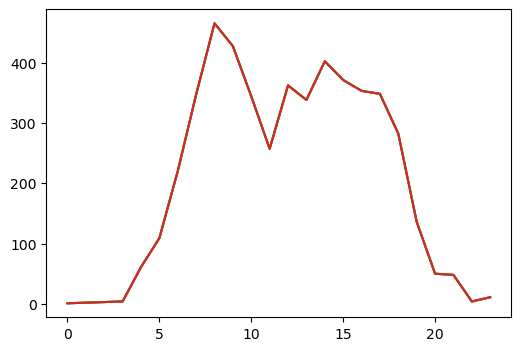

In [4]:
plt.figure(figsize=(6, 4)) 

df.endTime = pd.to_datetime(df.endTime) 

freq = df.groupby(df['endTime'].dt.hour).count()
plt.plot(freq)
plt.show()

<span style="font-family:Helvetica Light">

It appears the data are in UTC, while I reside in the Europe/Berlin timezone. Therefore, I'll need to convert it accordingly.

In [5]:
# localize the 'endTime' column to UTC
df['endTime'] = df['endTime'].dt.tz_localize('UTC')

# convert from UTC to Europe/Berlin timezone
df['endTime'] = df['endTime'].dt.tz_convert('Europe/Berlin')

df.head()

,endTime,artistName,trackName,msPlayed
0,2023-05-16 17:43:00+02:00,John Lennon,Isolation - Remastered 2010,142789
1,2023-05-17 06:43:00+02:00,John Lennon,Isolation - Remastered 2010,29448
2,2023-05-17 06:44:00+02:00,John Lennon,Love - Remastered 2010,65613
3,2023-05-17 06:46:00+02:00,Felipe Gordon,Inherently Deep,101308
4,2023-05-17 06:47:00+02:00,Golf Trip,L in Vain,92322


In [6]:
# converting milliseconds played to more readable formats
df['sPlayed'] = (df['msPlayed'] / 1000).round(2)
df['mPlayed'] = (df['sPlayed'] / 60).round(2)
df['hPlayed'] = (df['mPlayed'] / 60).round(2)

# additional time related transofmations 
df['hour'] = df['endTime'].dt.hour
df['date'] = pd.to_datetime(df['endTime'].dt.date)
df['week'] = df['date'].dt.to_period('W').dt.to_timestamp()
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()

df.head()

,endTime,artistName,trackName,msPlayed,sPlayed,mPlayed,hPlayed,hour,date,week,month
0,2023-05-16 17:43:00+02:00,John Lennon,Isolation - Remastered 2010,142789,142.79,2.38,0.04,17,2023-05-16,2023-05-15,2023-05-01
1,2023-05-17 06:43:00+02:00,John Lennon,Isolation - Remastered 2010,29448,29.45,0.49,0.01,6,2023-05-17,2023-05-15,2023-05-01
2,2023-05-17 06:44:00+02:00,John Lennon,Love - Remastered 2010,65613,65.61,1.09,0.02,6,2023-05-17,2023-05-15,2023-05-01
3,2023-05-17 06:46:00+02:00,Felipe Gordon,Inherently Deep,101308,101.31,1.69,0.03,6,2023-05-17,2023-05-15,2023-05-01
4,2023-05-17 06:47:00+02:00,Golf Trip,L in Vain,92322,92.32,1.54,0.03,6,2023-05-17,2023-05-15,2023-05-01


In [7]:
# load historical streaming podcast data
podcasts = pd.read_json('../data/raw/StreamingHistory_podcast_0.json')
print(podcasts.shape)
podcasts.head()

(102, 4)


,endTime,podcastName,episodeName,msPlayed
0,2023-05-17 16:00,Lex Fridman Podcast,"#367 – Sam Altman: OpenAI CEO on GPT-4, ChatGP...",1806958
1,2023-05-21 08:38,Meditation Mountain,10 Minute Guided Meditation for Mindfulness,434688
2,2023-06-04 08:04,This Past Weekend w/ Theo Von,E436 Caleb Pressley,2165418
3,2023-06-09 10:23,anything goes with emma chamberlain,a talk with mac demarco [video],401953
4,2023-06-09 11:41,anything goes with emma chamberlain,a talk with mac demarco [video],1805573


In [8]:
podcasts['endTime'] = pd.to_datetime(podcasts['endTime']) 
podcasts['endTime'] = podcasts['endTime'].dt.tz_localize('UTC')
podcasts['endTime'] = podcasts['endTime'].dt.tz_convert('Europe/Berlin')

podcasts['hPlayed'] = podcasts['msPlayed'] / (1000 * 60 * 60)

In [9]:
# load track details extracted from spotify
track_details = pd.read_csv('../data/track_details.csv')
track_details.head()

,artistName,trackName,artistId,trackId,trackPopularity,artistPopularity,noFollowers,artistGenres,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,John Lennon,Isolation - Remastered 2010,4x1nvY2FN8jxqAFA0DA02H,3sRQJYlA7P4oIRUwy8Im9r,43,66,5979523,"['classic rock', 'rock']",0.571,0.0788,...,-15.284,1.0,0.0393,0.909,0.00921,0.0794,0.254,115.726,172253.0,4.0
1,John Lennon,Love - Remastered 2010,4x1nvY2FN8jxqAFA0DA02H,0SEmf7XdvzCmmEjtpZKIKl,50,66,5979523,"['classic rock', 'rock']",0.613,0.0609,...,-21.297,1.0,0.0391,0.887,0.01970,0.0525,0.156,80.988,202147.0,4.0
2,Felipe Gordon,Inherently Deep,7rQKvsWUOJgXmInx2JuaXj,7uvLegwoUsnra3oZzimE4a,20,36,17379,"['jazz house', 'lo-fi house']",0.803,0.5700,...,-8.236,0.0,0.0638,0.147,0.91500,0.1070,0.331,121.950,395204.0,4.0
3,Golf Trip,L in Vain,2cSZwherHAASXofK9ZFK2A,7GbiGMXMmtoAOznmgLDt4H,30,29,2729,[],0.773,0.7270,...,-6.767,0.0,0.0417,0.182,0.03580,0.1130,0.950,108.003,254619.0,4.0
4,Loyle Carner,Ottolenghi,4oDjh8wNW5vDHyFRrDYC4k,64I9byMYBlS1ARsC3vtpgW,62,61,711297,"['indie soul', 'london rap']",0.776,0.5930,...,-10.535,1.0,0.2520,0.327,0.00616,0.1860,0.247,94.970,197601.0,4.0


<span style="font-family:Helvetica Light">
    
## Configuring Chart Styles
This section serves two main purposes:
- _Color Definition_:
  - Defining colors and color maps for all the charts, utilizing Spotify's brand color palette, specifically referencing the green shade provided in Spotify's brand guidelines.
- *Style Unification*:
    - Defining a function to unify the style across all charts, ensuring consistency in appearance.
</span>

In [10]:
spotify_colors = ['#1DB954', '#191414']
heat_pal = px.colors.sequential.YlGn

In [43]:
def write(fig, name, facet=True, tickdefault=True):        

    fig.update_layout(
        template='plotly_white',
        font_family='Helvetica'
    )
    
    fig.update_yaxes(color='grey')
    fig.update_xaxes(color='grey')

    # use renderer set to "notebook" to ensure the plotly chart is visible in github
    fig.show(renderer="jupyterlab")
    #fig.show(renderer="svg")
    
    pio.write_image(fig, f'../images/{name}.png', format='png', scale=5)

<span style="font-family:Helvetica Light">

## 1. Listening Patterns
### 1.1. Total Listening Time
First, let's examine how much time I spent listening to music and podcasts over the whole year. This gives us a big-picture view of my listening habits.

In [44]:
print(f'We are analyzing my streaming history from {df.endTime.min().date()} to {df.endTime.max().date()}.')

We are analyzing my streaming history from 2023-05-16 to 2024-05-17.


In [45]:
minutes_played = df.msPlayed.sum() / 60000
hours_played = minutes_played / 60

print(f'Minutes played in a year: {minutes_played:,.2f}')
print(f'Hours played in a year: {hours_played:,.2f}')

Minutes played in a year: 12,303.05
Hours played in a year: 205.05


<span style="font-family:Helvetica Light">

### 1.2. Monthly Listening Analysis
Next, let's break it down month by month to see if there are any patterns or changes over time.


In [46]:
# aggregating data
agg_dict = {'hPlayed': 'sum', 'trackName': 'count'}
df_agg = df.groupby(['date', 'hour'], as_index=False).agg(agg_dict)

# adding date features
df_agg['dow'] = df_agg['date'].dt.dayofweek
df_agg['dom'] = df_agg['date'].dt.day
df_agg['day'] = df_agg['date'].dt.strftime('%a')

df_agg = df_agg.sort_values(by=['dow', 'hour'], ascending=False)
cols = df_agg['hour'].unique().tolist()

# creating pivot table
df_agg = pd.pivot_table(df_agg, index=['date', 'dow', 'day', 'dom'], 
                        columns='hour', values='hPlayed', aggfunc='sum').fillna(0).reset_index()
hour_df = pd.melt(df_agg, id_vars=['date', 'dow', 'day', 'dom'], value_vars=cols)

# adding week and month columns
hour_df['week'] = hour_df['date'].dt.to_period('W').dt.to_timestamp()
hour_df['month'] = hour_df['date'].dt.to_period('M').dt.to_timestamp()

In [47]:
# calculating monthly usage
df_monthly = hour_df.groupby(['month'], as_index=False).agg({'value': 'sum', 'date': 'nunique'})
df_monthly['perc'] = 100 * (df_monthly['value'] / (24 * df_monthly['date']))

# identifying min and max values for annotation
min_perc = df_monthly['perc'].idxmin()
max_perc = df_monthly['perc'].idxmax()

# adding annotation text
df_monthly['text'] = ''
df_monthly.loc[[min_perc, max_perc], 'text'] = df_monthly.loc[[min_perc, max_perc], 'month'].dt.strftime('%b')

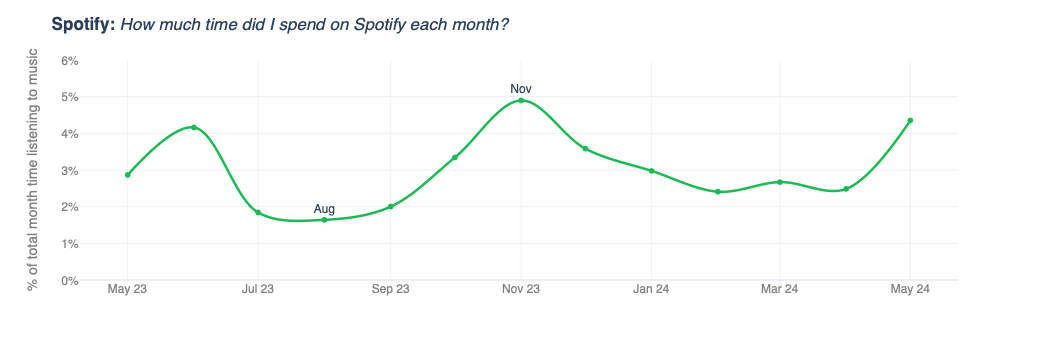

In [49]:
# plotting
fig = px.line(df_monthly, x='month', y='perc', line_shape='spline', text='text',
              color_discrete_sequence=spotify_colors)
fig.update_traces(mode='lines+markers+text', textposition='top center', line_width=2.5)
fig.update_yaxes(rangemode='tozero', ticksuffix='%')
fig.update_xaxes(tickformat='%b %y', nticks=7)
fig.update_layout(
    title='<b>Spotify:</b><i> How much time did I spend on Spotify each month?</i>',
    yaxis_title='% of total month time listening to music',
    xaxis_title='',
    yaxis_range=[0, 6],

)

write(fig, 'monthly_analysis')

<span style="font-family:Helvetica Light">

### 1.3. Weekly Listening Analysis

Now, let's zoom in on each week to see when I listen to music the most and if my habits change on weekends.

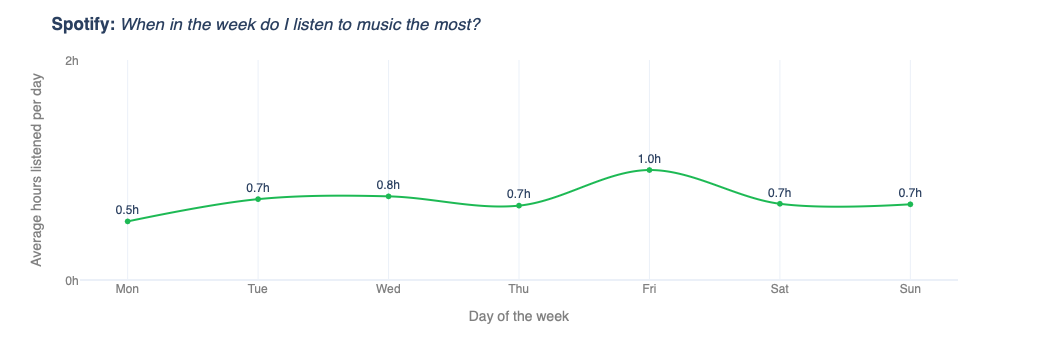

In [50]:
# aggregating data by date, day of the week, and day
df_daily_sum = hour_df.groupby(['date', 'dow', 'day'], as_index=False)['value'].sum()

# calculating the mean hours listened per day of the week
df_daily_mean = df_daily_sum.groupby(['dow', 'day'], as_index=False)['value'].mean().sort_values(by='dow')

# plotting
fig = px.line(df_daily_mean, x='day', y='value', color_discrete_sequence=spotify_colors, line_shape='spline')
fig.update_traces(mode='lines+markers+text', texttemplate='%{y:.1f}h', textposition='top center')
fig.update_yaxes(rangemode='tozero', ticksuffix='h', nticks=2)
fig.update_layout(
    title='<b>Spotify:</b><i> When in the week do I listen to music the most?</i>',
    yaxis_title='Average hours listened per day',
    yaxis_range=[0, 2],
    xaxis_title='Day of the week',
)

write(fig, 'weekly_analysis')

In [18]:
# assigning week period
hour_df['week_period'] = hour_df['dow'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekdays')

# aggregating data
df_weekend = hour_df.groupby(['hour', 'week_period'], as_index=False)['value'].mean().sort_values(by=['week_period', 'hour'])

# converting hours to minutes for better readability
df_weekend['hour_to_minutes'] = df_weekend['value'] * 60
df_weekend['text'] = ''

# adding annotation text for specific hours
df_weekend.loc[(df_weekend['week_period'] == 'Weekdays') & (df_weekend['hour'].isin([8, 10, 18])), 'text'] = df_weekend['hour'].apply(lambda x: "{:.0f}h".format(x))
df_weekend.loc[(df_weekend['week_period'] == 'Weekend') & (df_weekend['hour'].isin([10, 18, 21])), 'text'] = df_weekend['hour'].apply(lambda x: "{:.0f}h".format(x))

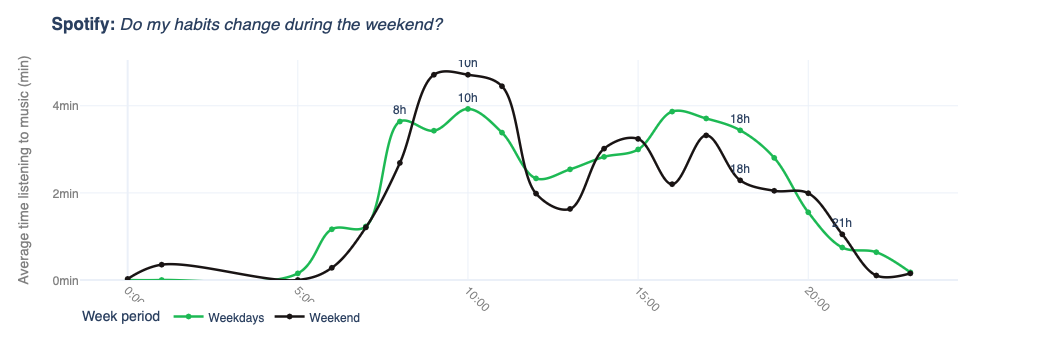

In [51]:
# plotting
fig = px.line(df_weekend, x='hour', y='hour_to_minutes', color='week_period', 
              text='text',line_shape='spline', color_discrete_sequence=spotify_colors)
fig.update_traces(mode='lines+markers+text', textposition='top center', line_width=2.5)
fig.update_yaxes(rangemode='tozero', ticksuffix='min', nticks=5)
fig.update_xaxes(title='', ticksuffix=':00', tickangle=45)
fig.update_layout(
    title='<b>Spotify:</b><i> Do my habits change during the weekend?</i>',
    legend_title='Week period',
    legend_orientation='h',
    yaxis_title='Average time listening to music (min)',
)

write(fig, 'weekday_vs_weekend')

<span style="font-family:Helvetica Light">

### 1.4. Daily Listening Analysis

I'll take an even closer look at each day to see how I use Spotify throughout the day and night.

In [20]:
df_hour = hour_df.groupby(['hour'], as_index=False).agg({'value':'mean'}).sort_values(by=['hour'])
df_hour.head(25)

,hour,value
0,0,0.000107
1,1,0.001571
2,5,0.001857
3,6,0.015464
4,7,0.020393
5,8,0.056393
6,9,0.062857
7,10,0.068964
8,11,0.061143
9,12,0.037321


<span style="font-family:Helvetica Light">

It seems that I'm not listening to any music between 1 and 5, so we need to fill in zeros for those hours.

In [21]:
# create a DataFrame containing all hours of the day
all_hours = pd.DataFrame({'hour': range(24)})

# merge the existing DataFrame with all_hours
df_hour = pd.merge(all_hours, df_hour, on='hour', how='left')

# fill missing values with 0
df_hour['value'].fillna(0, inplace=True)

df_hour['hour_to_minutes'] = df_hour['value']*60
df_hour['hour_to_minutes'] = df_hour['hour_to_minutes']*5

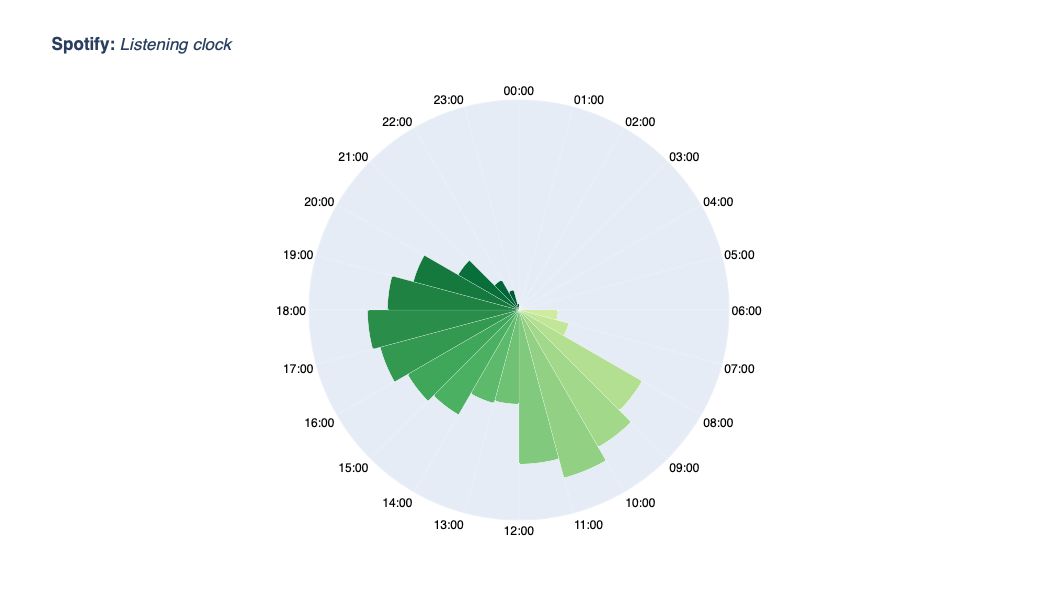

In [53]:
palette = sns.color_palette("YlGn", 24).as_hex() #RdYlBu

fig = go.Figure(go.Barpolar(
    r=df_hour.hour_to_minutes,
    theta=np.linspace(0, 360, 24, endpoint=False),
    width=15,
    marker_color=palette,
    marker_line_color='white',
    marker_line_width=0.10,
    offset=0
))

num_slices=24
angular_tickvals = [(i) * 360 / num_slices for i in range(num_slices)]
labels = [time(i, 0).strftime("%H:%M") for i in df_hour.hour]

fig.update_layout(
    title='<b>Spotify:</b><i> Listening clock</i>',
    template=None,
    polar = dict(
        bgcolor='#e5ecf6',
        radialaxis = dict(range=[0, 25], 
                          showticklabels=False,
                          ticks='', 
                          nticks=1,
                          color='grey', 
                          linewidth=0),
        angularaxis = dict(showticklabels=True, 
                           ticks='',
                           tickfont_size = 12,
                           tickfont_color = 'black',
                           rotation = 90,
                           direction = "clockwise",
                           color='white', 
                           tickmode='array',
                           tickvals=angular_tickvals,
                           ticktext=labels,
                           )
        
    ),
    height=600,
    width=800
)

write(fig, 'daily_listening_clock')

<span style="font-family:Helvetica Light">

## 2. Content Analysis
Let's analyze how much of my listening time is dedicated to music versus podcasts, discover which podcasts I listened to the most, and identify my favorite artists and tracks of the year.
### 2.1. Content Proportion

</span>

In [23]:
merged_df = pd.concat([df, podcasts])
merged_df['streamType'] = np.where(merged_df['podcastName'].isna(), 'music', 'podcast')
merged_df.groupby('streamType').size()

streamType
music      4940
podcast     102
dtype: int64

In [24]:
merged_df.groupby('streamType')['hPlayed'].sum()

streamType
music      204.020000
podcast     22.830856
Name: hPlayed, dtype: float64

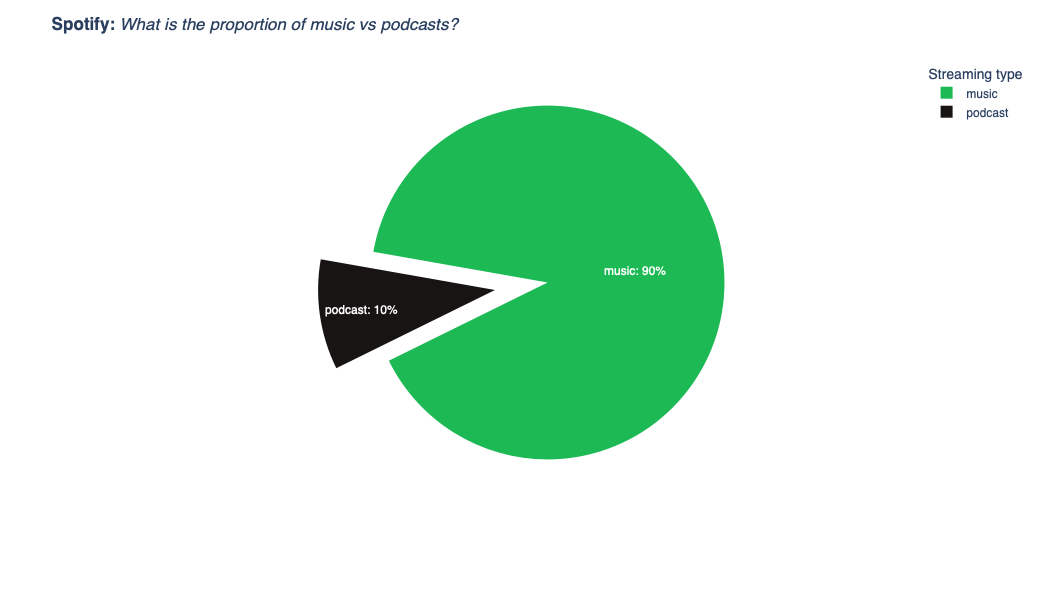

In [55]:
fig = px.pie(merged_df, values='hPlayed', names='streamType', color_discrete_sequence=spotify_colors)

fig.update_traces(textposition='inside', 
                  textinfo='percent+label',
                  pull=[0.3, 0], 
                  rotation=280, 
                  texttemplate="%{label}: %{percent:.0%}")


fig.update_layout(
    title='<b>Spotify:</b><i> What is the proportion of music vs podcasts?</i>',
    legend_title='Streaming type',
    height=600,
    width=800
)

write(fig, 'music_vs_podcasts')

<span style="font-family:Helvetica Light">
    
### 2.2. Top Podcasts

</span>

In [26]:
# load show details extracted from spotify
show_details = pd.read_csv('../data/show_details.csv')
show_details.head()

,podcastName,podcastId,imageUrl
0,Lex Fridman Podcast,2MAi0BvDc6GTFvKFPXnkCL,https://i.scdn.co/image/ab6765630000ba8a563ebb...
1,Meditation Mountain,6rmydpcCvLzN4744S1fCsW,https://i.scdn.co/image/ab6765630000ba8a4beb4a...
2,The Joe Rogan Experience,4rOoJ6Egrf8K2IrywzwOMk,https://i.scdn.co/image/ab6765630000ba8a20741e...
3,anything goes with emma chamberlain,5VzFvh1JlEhBMS6ZHZ8CNO,https://i.scdn.co/image/ab6765630000ba8a072189...
4,The Joe Rogan Experience,4rOoJ6Egrf8K2IrywzwOMk,https://i.scdn.co/image/ab6765630000ba8a20741e...


In [27]:
podcasts = pd.merge(podcasts, show_details, on='podcastName', how='left')

top_podcasts = podcasts.groupby(['podcastName', 'imageUrl'], as_index=False).agg({'hPlayed':'sum', 'episodeName': 'nunique'})

top_podcasts.sort_values(by='hPlayed', ascending=False, ignore_index=True, inplace=True)
top_podcasts_by_hrs = top_podcasts.head(10).reset_index(drop=True)

In [28]:
top_podcasts_by_hrs.head(10)

,podcastName,imageUrl,hPlayed,episodeName
0,The Diary Of A CEO with Steven Bartlett,https://i.scdn.co/image/ab6765630000ba8af82cef...,65.911058,17
1,anything goes with emma chamberlain,https://i.scdn.co/image/ab6765630000ba8a072189...,58.904816,12
2,Huberman Lab,https://i.scdn.co/image/ab6765630000ba8aaa4830...,14.937915,4
3,Lex Fridman Podcast,https://i.scdn.co/image/ab6765630000ba8a563ebb...,7.594739,3
4,The Sleep Zone Podcast,https://i.scdn.co/image/ab6765630000ba8a37c0d8...,0.130145,1
5,Meditation Mountain,https://i.scdn.co/image/ab6765630000ba8a4beb4a...,0.120747,1
6,"Today, Explained",https://i.scdn.co/image/ab6765630000ba8adfc0a3...,0.007716,1
7,The Joe Rogan Experience,https://i.scdn.co/image/ab6765630000ba8a20741e...,0.001176,1


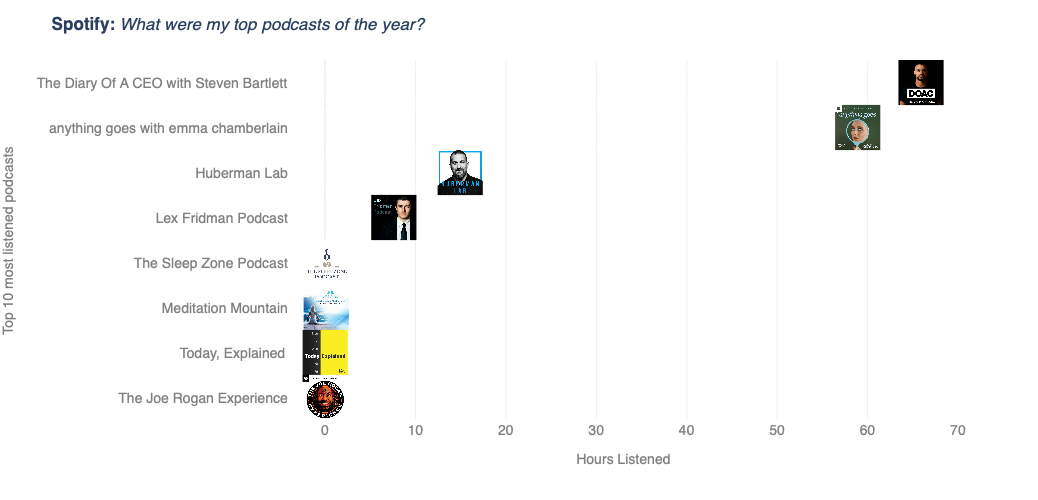

In [57]:
fig = px.bar(top_podcasts_by_hrs, y='podcastName', x='hPlayed', facet_col_spacing=0.1,
                color_discrete_sequence=spotify_colors)

fig.update_yaxes(autorange='reversed', zeroline=False, tickfont_size=14)
fig.update_xaxes(rangemode='tozero', range=[-4, 70], tickfont_size=14)


fig.update_layout(
    title='<b>Spotify:</b><i> What were my top podcasts of the year?</i>',
    xaxis_title='Hours Listened',
    yaxis_title='Top 10 most listened podcasts',
    height=500,
    width=1000
)

# adjusting the size of images
multiplier = 5

for i, row in top_podcasts_by_hrs.iterrows():
    fig.update_traces(marker_color="rgba(0,0,0,0)")
    image = row['imageUrl']
    fig.add_layout_image(
        dict(
            source=f'{image}',
            xref="x",
            yref="y",
            xanchor="center",
            yanchor="middle",
            x=row["hPlayed"],
            y=i,
            sizex=multiplier, 
            sizey=multiplier, 
            sizing="contain",
            opacity=1,
            layer="above"
        )
    )

write(fig, 'top_podcasts')

<span style="font-family:Helvetica Light">
    
### 2.3. Top Tracks and Artists

</span>

In [30]:
df = pd.merge(df, track_details, on=['artistName', 'trackName'], how='left')
print(df.shape)

(4940, 30)


In [35]:
# group by month, trackName, and artistName for track data
df_track = df.groupby(['month', 'trackName', 'artistName'], as_index=False).agg({'hPlayed': 'sum', 'trackId': 'count'})
df_track['category'] = 'Top Track'

# group by month and artistName for artist data
df_artist = df.groupby(['month', 'artistName'], as_index=False).agg({'hPlayed': 'sum', 'trackId': 'count'})
df_artist['trackName'] = ''
df_artist['category'] = 'Top Artist']

df_top = pd.concat([df_track, df_artist]).reset_index(drop=True)

# rank within each category and month
df_top['rank'] = df_top.groupby(['category', 'month'])['trackId'].rank(ascending=False, method='first')

# calculate total songs per category and month
df_top['total_songs'] = df_top.groupby(['category', 'month'])['trackId'].transform('sum')

# create 'info' column
# - for 'Top Track' category: combines track name and artist name (e.g., "Le jardin - La Femme")
# - for 'Top Artist' category: contains only the artist name (e.g., "Mac Miller")
df_top['info'] = df_top.apply(lambda x: f"{x['trackName']} - {x['artistName']}" if 'Track' in x['category'] else x['artistName'], axis=1)

# adjust 'trackId' for 'Top Artist' category to represent percentage
df_top.loc[df_top['category'] == 'Top Artist', 'trackId'] = 100 * df_top['trackId'] / df_top['total_songs']

In [36]:
df_top = df_top.loc[df_top['rank'] == 1]

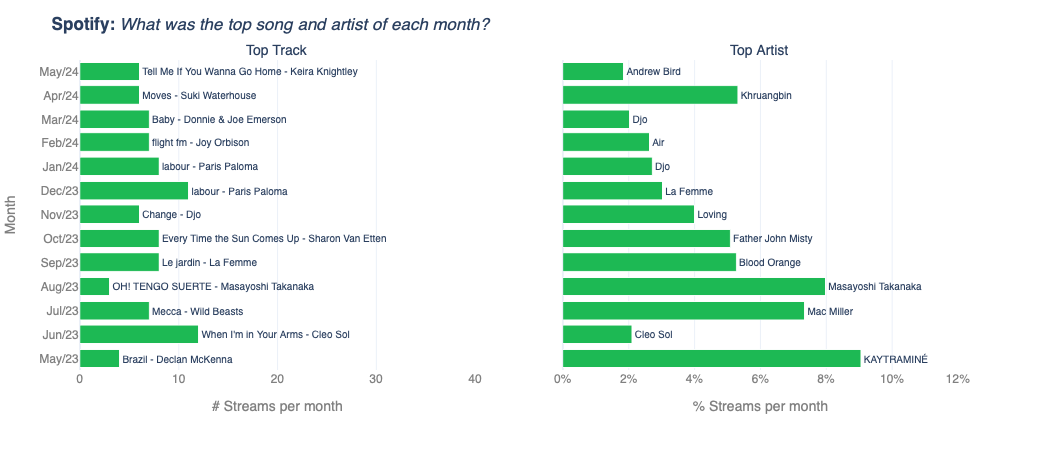

In [58]:
# create the bar plot
fig = px.bar(df_top, y='month', x='trackId', facet_col='category', text='info', facet_col_spacing=0.1,
             color_discrete_sequence=spotify_colors)

# update y-axis to display each month
fig.update_yaxes(
    tickformat='%b/%y',
    dtick="M1",  # ensures each month is displayed
    tickmode="linear"  # ensures ticks are evenly spaced by month
)

# update x-axes settings
fig.update_xaxes(matches=None, nticks=7)
fig.update_xaxes(col=1, title='# Streams per month', range=[0, 40])
fig.update_xaxes(col=2, title='% Streams per month', ticksuffix='%', range=[0, 12])

# Update traces to position text outside the bars
fig.update_traces(textposition='outside')

# update facet annotations to remove "category=" and format text
fig.for_each_annotation(lambda a: a.update(text=a.text.replace("category=", "").replace("_", " ")))

fig.update_layout(
    title='<b>Spotify:</b><i> What was the top song and artist of each month?</i>',
    yaxis_title='Month',
    height=450,  # adjust height to better accommodate the plot
)

fig.update_traces(textfont_size=10)
fig.for_each_annotation(lambda a: a.update(font_size=14))

write(fig, 'top_tracks_and_artists_per_month')

In [38]:
df_genres = df[['endTime','artistName','trackName', 'hPlayed', 'artistGenres']].copy()
df_genres.dropna(subset=['artistGenres'], inplace=True)
df_genres.head()

,endTime,artistName,trackName,hPlayed,artistGenres
0,2023-05-16 17:43:00+02:00,John Lennon,Isolation - Remastered 2010,0.04,"['classic rock', 'rock']"
1,2023-05-17 06:43:00+02:00,John Lennon,Isolation - Remastered 2010,0.01,"['classic rock', 'rock']"
2,2023-05-17 06:44:00+02:00,John Lennon,Love - Remastered 2010,0.02,"['classic rock', 'rock']"
3,2023-05-17 06:46:00+02:00,Felipe Gordon,Inherently Deep,0.03,"['jazz house', 'lo-fi house']"
4,2023-05-17 06:47:00+02:00,Golf Trip,L in Vain,0.03,[]


In [39]:
df_genres.artistGenres = df_genres.artistGenres.apply(ast.literal_eval)
df_genres = df_genres.explode('artistGenres').reset_index(drop=True)
df_genres.dropna(subset=['artistGenres'], inplace=True)
df_genres.drop_duplicates(inplace=True, ignore_index=True, keep='first')
df_genres.head()

,endTime,artistName,trackName,hPlayed,artistGenres
0,2023-05-16 17:43:00+02:00,John Lennon,Isolation - Remastered 2010,0.04,classic rock
1,2023-05-16 17:43:00+02:00,John Lennon,Isolation - Remastered 2010,0.04,rock
2,2023-05-17 06:43:00+02:00,John Lennon,Isolation - Remastered 2010,0.01,classic rock
3,2023-05-17 06:43:00+02:00,John Lennon,Isolation - Remastered 2010,0.01,rock
4,2023-05-17 06:44:00+02:00,John Lennon,Love - Remastered 2010,0.02,classic rock


In [40]:
genres = pd.DataFrame(df_genres.groupby('artistGenres')['hPlayed'].sum()).sort_values(by='hPlayed', ascending=False).reset_index()
genres.head(10)

,artistGenres,hPlayed
0,chamber pop,26.42
1,indie rock,22.61
2,art pop,19.35
3,singer-songwriter,14.68
4,modern rock,13.64
5,indie pop,13.17
6,indietronica,13.14
7,rock,13.08
8,alternative rock,9.34
9,melancholia,9.15


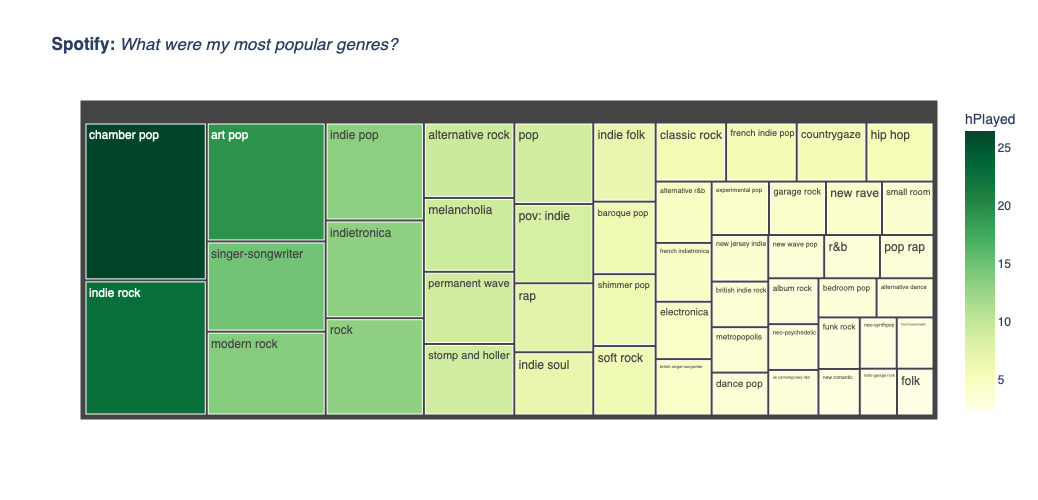

In [60]:
# select top N genres
top_n = 50
top_genres = genres.head(top_n)

# plotting
fig = px.treemap(top_genres, path=['artistGenres'], values='hPlayed',
                 color='hPlayed', color_continuous_scale=heat_pal,
                 title='<b>Spotify:</b><i> What were my most popular genres?</i>',
                 hover_data=['hPlayed'])

fig.update_layout(
    height=500,
    width=1000
)

write(fig, 'top_genres_treemap')

In [42]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']